In [2]:
import numpy as np
import pandas as pd

In [1]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
y_train.shape

(60000,)

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
import matplotlib.pyplot as plt

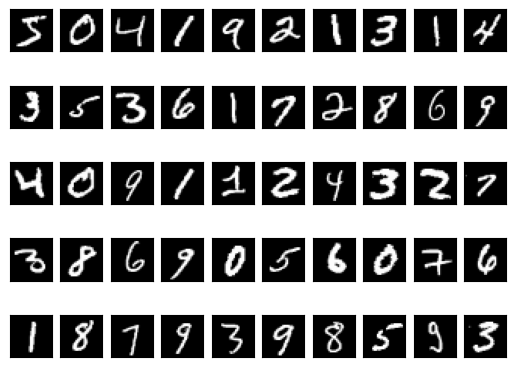

In [8]:
for digit_num in range(0,50):
    plt.subplot(5,10, digit_num+1)
    mat_data = X_train[digit_num].reshape(28,28)
    plt.imshow(mat_data, cmap = 'gray')
    plt.xticks([])
    plt.yticks([])

In [9]:
y_train[0:50]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

In [14]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
# Scaling images by dividing by 255
X_train = X_train/255
X_test = X_test/255

In [15]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [16]:
X_train.shape

(60000, 784)

In [19]:
X_test.shape

(10000, 784)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
tf.random.set_seed(12345)

In [22]:
model = Sequential()

In [23]:
# First Hidden Layer
model.add(Dense(units=128,
                activation='relu',
                input_shape=(784,)))

In [24]:
# Second Hidden Layer
model.add(Dense(units=64,
                activation='relu'))

In [25]:
# Third Hidden layer
model.add(Dense(units=32,
                activation='relu'))

In [26]:
# Output Layer
model.add(Dense(units=10,
                activation='softmax'))

In [27]:
array_val = [1,2,3]
print(array_val)
e_array = np.exp(array_val)
print(e_array)
e_array = e_array/np.sum(e_array)
print(e_array)
print(e_array.sum())
#np.exp(array_val)/np.sum(np.exp(array_val))

[1, 2, 3]
[ 2.71828183  7.3890561  20.08553692]
[0.09003057 0.24472847 0.66524096]
1.0


In [28]:
np.exp(1), np.exp(2), np.exp(3)

(2.718281828459045, 7.38905609893065, 20.085536923187668)

In [29]:
2.718281828459045+7.38905609893065+20.085536923187668

30.19287485057736

In [32]:
np.exp(3)/(2.718281828459045+7.38905609893065+20.085536923187668)

0.6652409557748219

In [33]:
0.09003057+0.24472847+0.66524096

1.0

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
(28*28+1)*128

100480

In [37]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
# 5 -> [0,0,0,0,1,0,0,0,0,0]
# 0 -> [1,0,0,0,0,0,0,0,0,0]

In [38]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [39]:
result = model.fit(X_train,
                   y_train,
                   validation_data = (X_test, y_test),
                   epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2477 - accuracy: 0.9255 - val_loss: 0.1432 - val_accuracy: 0.9552
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1040 - accuracy: 0.9678 - val_loss: 0.1042 - val_accuracy: 0.9663
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0767 - accuracy: 0.9752 - val_loss: 0.0886 - val_accuracy: 0.9723
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0577 - accuracy: 0.9817 - val_loss: 0.0862 - val_accuracy: 0.9738
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0450 - accuracy: 0.9849 - val_loss: 0.0762 - val_accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0401 - accuracy: 0.9871 - val_loss: 0.0693 - val_accuracy: 0.9780
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0308 - accuracy: 0.9897 - val_loss: 0.0837 - val_accurac

In [40]:
print(model.predict(X_train)[0])
print(np.argmax(model.predict(X_train)[0]))

1875/1875 [==============================] - 4s 2ms/step
[3.7083863e-18 5.7938879e-15 5.1462339e-16 1.7889257e-06 3.1005935e-23
 9.9999815e-01 9.8523552e-22 3.6465665e-17 1.3396309e-16 1.3514829e-12]
1875/1875 [==============================] - 4s 2ms/step
5


In [41]:
y_train[0]

5

In [42]:
y_train_pred = np.argmax(model.predict(X_train), axis=1)

1875/1875 [==============================] - 4s 2ms/step


In [43]:
y_test_pred = np.argmax(model.predict(X_test),axis=1)

313/313 [==============================] - 1s 2ms/step


In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [45]:
print("Confusion Matrix")
print(confusion_matrix(y_pred = y_train_pred, y_true=y_train))
print("\n")
print(f" Accuracy {accuracy_score(y_pred = y_train_pred, y_true=y_train)}")

Confusion Matrix
[[5914    0    2    0    0    1    3    0    2    1]
 [   0 6726    5    0    7    0    1    1    2    0]
 [   0    1 5947    2    0    0    1    0    7    0]
 [   1    2   26 6051    0   16    1    5   14   15]
 [   0    0    1    0 5838    0    1    1    0    1]
 [   1    1    0    3    0 5411    1    0    2    2]
 [   2    0    1    0    2    9 5902    0    2    0]
 [   0    6   19    0    7    0    0 6217    0   16]
 [   0   14   14    7    2    4    2    2 5805    1]
 [   4    0    0    2   18    4    0    3    2 5916]]


 Accuracy 0.99545


In [46]:
print("Confusion Matrix")
print(confusion_matrix(y_pred = y_test_pred, y_true=y_test))
print("\n")
print(f" Accuracy {accuracy_score(y_pred = y_test_pred, y_true=y_test)}")

Confusion Matrix
[[ 972    0    0    0    2    0    2    1    3    0]
 [   0 1126    4    0    1    0    1    0    3    0]
 [   3    0 1021    2    0    0    2    1    3    0]
 [   2    1   11  976    0    4    0    6    5    5]
 [   0    0    2    0  969    0    5    1    0    5]
 [   2    0    0    7    1  872    5    0    3    2]
 [   2    2    0    1    4   10  937    0    2    0]
 [   0    3   12    2    2    0    0  999    1    9]
 [   3    1    5    0    3    7    2    2  945    6]
 [   4    2    0    2   14    3    0    1    3  980]]


 Accuracy 0.9797


In [47]:
history = pd.DataFrame(result.history)

In [48]:
history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.247732,0.925517,0.143215,0.9552
1,0.103951,0.967800,0.104238,0.9663
2,0.076714,0.975217,0.088574,0.9723
3,0.057725,0.981683,0.086178,0.9738
4,0.045042,0.984867,0.076222,0.9781


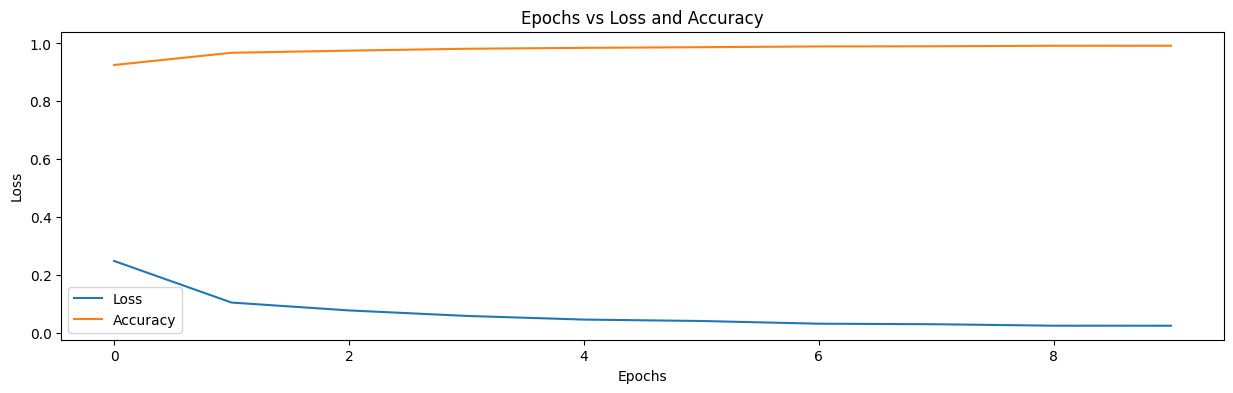

In [49]:
plt.figure(figsize = (15,4))
plt.plot(history.loss, label='Loss')
plt.plot(history.accuracy, label='Accuracy')
plt.title('Epochs vs Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

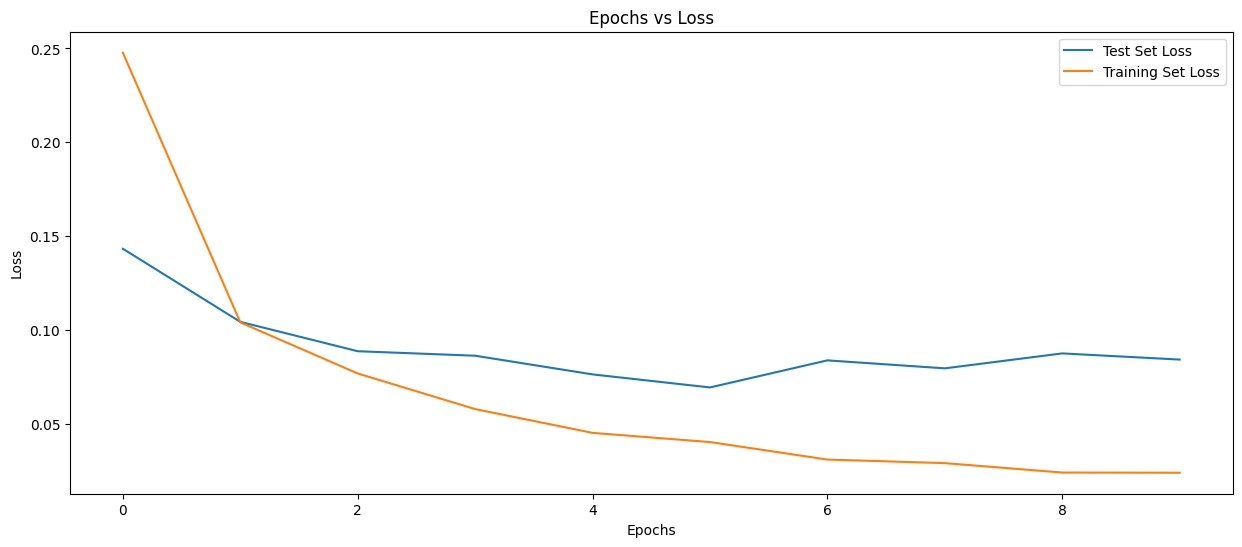

In [50]:
plt.figure(figsize = (15,6))
plt.plot(history.val_loss, label='Test Set Loss')
plt.plot(history.loss, label='Training Set Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

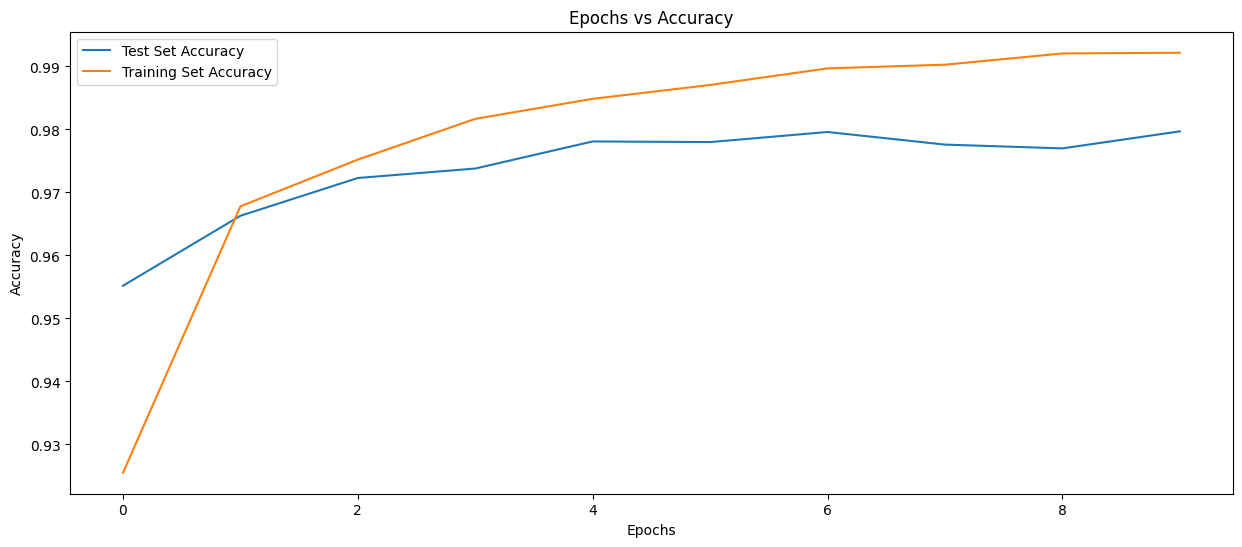

In [51]:
plt.figure(figsize = (15,6))
plt.plot(history.val_accuracy, label='Test Set Accuracy')
plt.plot(history.accuracy, label='Training Set Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()